# TODO

## Installing Libraries

In [33]:
%pip install numpy pandas scipy matplotlib

## Data download and inspection

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
!wget https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-Re.csv
!wget https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-data.csv
!wget https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-space.csv

--2023-10-12 20:47:36--  https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-Re.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1200006 (1.1M) [text/plain]
Saving to: ‘velprof-Re.csv.1’

velprof-Re.csv.1    100%[===================>]   1.14M  --.-KB/s    in 0.07s   

2023-10-12 20:47:36 (17.2 MB/s) - ‘velprof-Re.csv.1’ saved [1200006/1200006]

--2023-10-12 20:47:36--  https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awai

Read Reynolds (the lables for our model)

In [119]:
data_Re = pd.read_csv("velprof-Re.csv", index_col=False)
data_Re.head()

,Re(-)
0,323590.756
1,194866.844
2,104938.956
3,227933.606
4,817618.639


Read the data file (the features for our model)

In [37]:
data_v = pd.read_csv("velprof-data.csv", index_col=False)
data_v.head()

,mu(Pas),rho(kg/m3),L(m),R(m),vel[0](m/s),vel[1](m/s),vel[2](m/s),vel[3](m/s),vel[4](m/s),vel[5](m/s),...,vel[40](m/s),vel[41](m/s),vel[42](m/s),vel[43](m/s),vel[44](m/s),vel[45](m/s),vel[46](m/s),vel[47](m/s),vel[48](m/s),vel[49](m/s)
0,0.000630,996.232835,69.244194,0.408814,0.299430,0.298652,0.297860,0.297052,0.296230,0.295391,...,0.241785,0.238218,0.234238,0.229725,0.224501,0.218267,0.210486,0.199988,0.183239,0.0
1,0.001484,1117.370480,94.471272,0.352740,0.443518,0.442301,0.441061,0.439799,0.438513,0.437201,...,0.353860,0.348349,0.342204,0.335246,0.327199,0.317612,0.305665,0.289586,0.264034,0.0
2,0.000372,1039.442220,89.215592,0.248828,0.092274,0.092004,0.091728,0.091448,0.091162,0.090870,...,0.072484,0.071278,0.069935,0.068416,0.066662,0.064576,0.061983,0.058504,0.053003,0.0
3,0.000189,1045.145970,20.190082,0.086718,0.286730,0.285957,0.285169,0.284366,0.283549,0.282715,...,0.229634,0.226117,0.222195,0.217751,0.212611,0.206484,0.198845,0.188556,0.172184,0.0
4,0.002309,1086.237000,17.299562,0.136982,7.472177,7.454603,7.436702,7.418460,7.399864,7.380898,...,6.157494,6.075227,5.983290,5.878885,5.757750,5.612884,5.431484,5.185726,4.791076,0.0


In [38]:
data_r = pd.read_csv("velprof-space.csv", index_col=False)
data_r.head()

,r[0](m),r[1](m),r[2](m),r[3](m),r[4](m),r[5](m),r[6](m),r[7](m),r[8](m),r[9](m),...,r[40](m),r[41](m),r[42](m),r[43](m),r[44](m),r[45](m),r[46](m),r[47](m),r[48](m),r[49](m)
0,0.0,0.008343,0.016686,0.025029,0.033373,0.041716,0.050059,0.058402,0.066745,0.075088,...,0.333726,0.342069,0.350412,0.358756,0.367099,0.375442,0.383785,0.392128,0.400471,0.408814
1,0.0,0.007199,0.014398,0.021596,0.028795,0.035994,0.043193,0.050391,0.057590,0.064789,...,0.287951,0.295150,0.302349,0.309548,0.316746,0.323945,0.331144,0.338343,0.345541,0.352740
2,0.0,0.005078,0.010156,0.015234,0.020312,0.025391,0.030469,0.035547,0.040625,0.045703,...,0.203125,0.208203,0.213281,0.218359,0.223437,0.228515,0.233593,0.238672,0.243750,0.248828
3,0.0,0.001770,0.003539,0.005309,0.007079,0.008849,0.010618,0.012388,0.014158,0.015928,...,0.070790,0.072560,0.074329,0.076099,0.077869,0.079639,0.081408,0.083178,0.084948,0.086718
4,0.0,0.002796,0.005591,0.008387,0.011182,0.013978,0.016773,0.019569,0.022364,0.025160,...,0.111822,0.114618,0.117414,0.120209,0.123005,0.125800,0.128596,0.131391,0.134187,0.136982


In [97]:
data_all =  pd.concat([data_v, data_Re], axis=1)

Let's plot a random profile

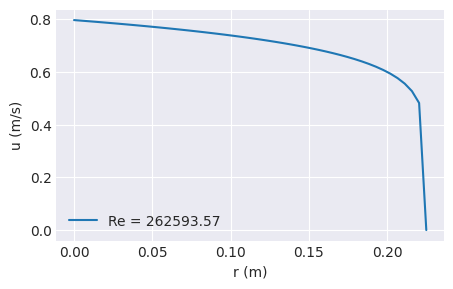

In [112]:
fig = plt.figure(figsize=(5,3))
indx = np.random.randint(data_v.shape[0]-1)

with plt.style.context("seaborn-v0_8-darkgrid"):
  ax = fig.add_subplot(111)
  ax.plot(data_r.iloc[indx,:], data_v.iloc[indx,4:], label=f"Re = {data_Re.iloc[indx].values[0]:1.2f}")
  ax.legend(loc="lower left")
  ax.set_xlabel("r (m)")
  ax.set_ylabel("u (m/s)")

Let's study the data and its correlation

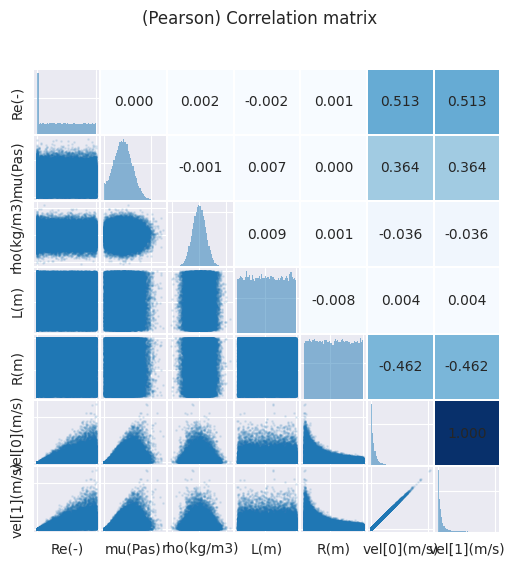

In [98]:
# Correlation matrix plot

Nbins = 50
fig = plt.figure(figsize=(6,6))
label = ["Re(-)", "mu(Pas)", "rho(kg/m3)", "L(m)", "R(m)", "vel[0](m/s)", "vel[1](m/s)"]
N = len(label)
corr_matrix = data_all.corr()
with plt.style.context("seaborn-v0_8-darkgrid"):
  gird = fig.add_gridspec(N, N, wspace=0.03, hspace=0.03)
  ax = []
  cmap = plt.get_cmap('Blues')
  for i in range(N):
    for j in range(N):
      ax.append(fig.add_subplot(gird[i,j]))
      if j < i:
        ax[-1].scatter(data_all[label[j]], data_all[label[i]], s=1, alpha=.1)
      elif j > i:
        corr = corr_matrix.loc[label[j], label[i]]
        ax[-1].text(.5, 0.5, f"{corr:1.3f}", ha="center", va="center")
        ax[-1].set_facecolor(cmap(np.abs(corr)))
        ax[-1].set_xticks([])
        ax[-1].set_yticks([])
      else:
        ax[-1].hist(data_all[label[i]], bins=Nbins, alpha=.5)
      if j == 0  or i == N-1:
        if j == 0  and i != N-1:
          ax[-1].set_ylabel(label[i])
          ax[-1].set_xticklabels([])
        elif i == N-1 and j != 0:
          ax[-1].set_xlabel(label[j])
          ax[-1].set_yticklabels([])
        else:
          ax[-1].set_ylabel(label[i])
          ax[-1].set_xlabel(label[j])
      ax[-1].set_xticklabels([])
      ax[-1].set_yticklabels([])
  fig.suptitle("(Pearson) Correlation matrix")
plt.show()

## Split database

80,000 is too many; let's reduce it to 5,000 by randomly selecting from the entire database.



In [113]:
Nall = data_v.shape[0]
Nsmall = 5000

rand_gen = np.random.default_rng(seed=1234)
indx = rand_gen.choice(np.arange(Nall), size=Nsmall, replace=False)

data_v_small = data_v.iloc[indx, :]
data_Re_small = data_Re.iloc[indx, :]

In [116]:
a = data_v.iloc[indx, 0]